# SMC2017: Preparatory exercises

These problems are meant for repetition and to get familiar with some commonly used functions in the chosen language.

## Setup

In [1]:
import numpy as np
from scipy.stats import norm

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()

## P.1 Random number generation basics

### a) Generation of $N(0, 2)$ distributed numbers

In the exercise the normal distribution is parametrized by the mean and the variance, i.e. $N(\mu, \sigma^2)$. In Numpy and Scipy the normal distribution is parametrized by the mean and the standard deviation, i.e. I will have to generate samples with $\mu = 0$ and $\sigma = \sqrt{2}$.

In [20]:
samples = norm.rvs(0, np.sqrt(2), 1000)
xs = np.arange(-6, 6, 0.05)
pdf = norm.pdf(xs, loc=0, scale=np.sqrt(2))

Plot the generated samples and the density function.

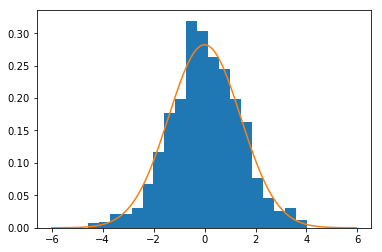

In [21]:
fig, ax = plt.subplots()

ax.hist(samples, bins=20, normed=True)
ax.plot(xs, pdf)

### b) Inverse transform sampling

`np.random.rand` generates uniformly distributed samples in the interval $[0, 1)$. Since it is a continuous distribution it does not matter wether 1 is part of the interval or not, since the probability of attaining it is zero anyways.

In [24]:
samples = np.random.rand(1000)
transformed_samples = norm.ppf(samples, loc=0, scale=1)

xs = np.arange(-4, 4, 0.05)
pdf = norm.pdf(xs, loc=0, scale=1)

Plot a histogram of the transformed samples and the density function.

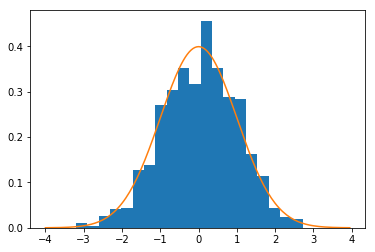

In [25]:
fig, ax = plt.subplots()

ax.hist(transformed_samples, bins=20, normed=True)
ax.plot(xs, pdf)

### c) Affine transform

For the one-dimensional normal distribution it holds that if $Z \sim N(0, 1)$ and $a, b \in \mathbb{R}$ then $b \cdot Z + a \sim N(a, b^2)$, where the normal distribution is parametrized with respect to the variance.

To get samples of $N(2, 10)$ from $N(0, 1)$ we have to apply the affine transform $f(z) := \sqrt{10} \cdot z + 2$.

In [31]:
samples = norm.rvs(0, 1, 1000)
transformed_samples = 2 + np.sqrt(10) * samples

Calculate the variance of the transformed sample to check if the affine transform was chosen right.

In [33]:
np.var(transformed_samples)

10.697041676969741

This is reasonable close to 10 and the transform is therefore likely to be correct.

### d) Set the random seed

Numpy uses Mersenne Twister as its pseudo-random number generator and offers the function `np.random.seed` to set the random seed. This will also set the seed for the scipy functions since they are based on Numpy.

In [34]:
np.random.seed(2017)
print(np.random.normal(0, 1, 5))
np.random.seed(2017)
print(norm.rvs(0, 1, 5))

[-1.02294529 -0.14039799  0.19909227  0.57347598 -0.39457786]
[-1.02294529 -0.14039799  0.19909227  0.57347598 -0.39457786]


## P.2 Compute $\pi$ using Monte Carlo

A simple way to calculate $\pi$ numerically from probabilistic arguments is presented. The setting is an infinite wall, divided into squares of equal size and each square contains a circle which fills as much space in the square as possible.

If one throws a dart at this wall, uniformly at random, then the probability to hit any square is equal to 1. Instead of considering an infinite amount of squares it is therefore enough to look at a single square.

Assume the square has sides of length $2r$, then the largest circle that fits into the square has the same midpoint as the square and radius $r$. If the dart is thrown uniformly at the square, then the probability to hit the circle is proportional to the areas of the circle and the square and is 
$$\frac{\pi r^2}{4 r^2} = \frac{\pi}{4}.$$

This is the same probability as hitting inside any circle on the infinite wall. Note that the parameter $r$ does not have any influence on the probability.

A simple Monte Carlo method to calculate $\pi$ is therefore to sample uniformly $x$ and $y$ coordinates from $[0, 1)$ (this is justified since $r$ is not relevant in itself) and check whether the sampled point lies inside the circle. This can be done by checking that $\left(x - \frac{1}{2}\right)^2 + \left(y - \frac{1}{2}\right)^2 \leq \frac{1}{4}$. The frequency of landing inside the circle should converge to $\frac{\pi}{4}$. Let $\hat{p}$ be the frequency of hitting the circle, then $4 \hat{p} \approx \pi$.

In [53]:
class EstimatePi:
    
    def __init__(self):
        # Vectorize inside_circle function
        self.inside_circle_vec = np.vectorize(self.inside_circle)
    
    @staticmethod
    def inside_circle(x, y):
        if (x - 0.5)**2 + (y - 0.5)**2 <= 0.25:
            return 1
        else:
            return 0
        
    def estimate(self, n):
        samples = np.random.rand(n, 2)
    
        p_hat = np.sum(self.inside_circle_vec(
            x=samples[:, 0], y=samples[:, 1])) / n
        return 4 * p_hat

Estimate $\pi$ a couple of times for different $N$.

In [93]:
ep = EstimatePi()
ns = np.logspace(3, 5, num=30)
ests = [ep.estimate(int(n)) for n in ns]

Plot the results

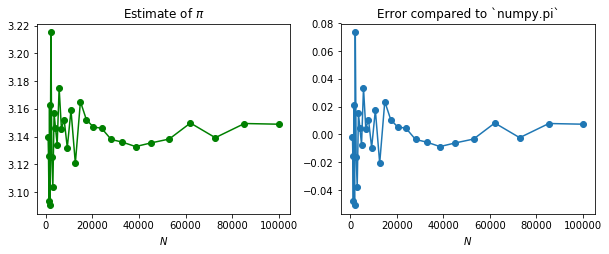

In [94]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3.5))

axs[0].plot(ns, ests, '-o', color='g')
axs[0].set_title('Estimate of $\pi$')
axs[0].set_xlabel('$N$')

axs[1].plot(ns, np.array(ests) - np.pi, '-o')
axs[1].set_title('Error compared to `numpy.pi`')
axs[1].set_xlabel('$N$')

## P.3 Analytical manipulation of Gaussian densities

Solved on paper. See folder `exercises_on_paper`.